In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 주제 : 서울시 구별 CCTV 현황 분석

## 부제 : 우리 동네 CCTV는 과연 충분한가 ?

+ 출처 : https://data.seoul.go.kr/
    - "CCTV 현황" : http://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do
    - "서울시 인구" : https://data.seoul.go.kr/dataList/419/S/2/datasetView.do


## 1. Data Prepare

### (1) CCTV Data

In [2]:
cctv_seoul = pd.read_csv("data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### (2) Population Data

In [6]:
# usecols 는 read_excel에서 필요한 열을 뽑아오는 옵션
# header 는 제목설정 옵션이며 아래에서는 2번째 행을 제목(맨 위)으로 설정하므로 0행, 1행은 삭제되고 새로 지정된다.

pop_seoul = pd.read_excel("data/seoul/Report.xls", usecols="B, D, G, J, N", header=2)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


## 2. EDA & Preprocessing

### 2-1. 컬럼 이름 변경

In [11]:
##### CCTV 자료에서 "기관명" 이라는 컬럼을 "구별"로 변경

# rename(columns={ : }) 를 통해 컬럼명 변경가능하고 inplace=True 옵션을 통해 변경된 데이터를 원본에 바로 저장가능
cctv_seoul.rename(columns={"기관명":"구별"}, inplace=True)

# df.columns=[ ] 를 사용하여 컬럼명을 변경시에는 모든 컬럼명을 다 적어주어야한다.
# cctv_seoul.columns=["구별", "소계", "2013년도 이전", "2014년", "2015년", "2016년"]

cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [16]:
##### 인구 데이터에서 컬럼명을 각각 구별, 인구수, 한국인, 외국인, 고령자로 변경

pop_seoul.columns=["구별", "인구수", "한국인", "외국인", "고령자"]
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


### 2-2. CCTV 현황 탐색

+ 어느 구가 가장 CCTV가 많이 설치되어 있는가 ? 또는 적게 설치되어 있는가 ?

In [25]:
# cctv_seoul.sort_values(by="소계")
cctv_seoul.sort_values(["소계"], ascending=False)      # ascending=False 는 내림차순 설정
# cctv_seoul.sort_values(["소계"])[["구별","소계"]]       #구별, 소계만 뽑아보기

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468
20,용산구,2096,1368,218,112,398
6,구로구,1884,1142,173,246,323
10,동대문구,1870,1070,23,198,579
16,성북구,1651,1009,78,360,204
22,종로구,1619,464,314,211,630


+ 최근 증가율 이라는 파생변수를 추가
+ (2014년+2015년+2016년) / (2013년도 이전) * 100
+ CCTV의 설치 증가율에 따라 가장 높은 구와 가장 적은 구를 탐색

In [34]:
cctv_seoul["최근 증가율"] = ((cctv_seoul["2014년"] + cctv_seoul["2015년"] + cctv_seoul["2016년"]) / (cctv_seoul["2013년도 이전"])) * 100
cctv_seoul.sort_values(["최근 증가율"], ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


### 2-3. 인구 데이터에서 전처리

In [36]:
##### 필요없는 행 삭제 (여기서는 첫번째 행 삭제) : drop, del    - default 가 drop 은 행 , del 은 열

pop_seoul.drop([0], inplace=True)

In [37]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002
10,도봉구,345041,342861,2180,54293


In [46]:
##### 구별 데이터의 중복이나 결측치 등을 확인

print(len(pop_seoul["구별"].unique()))
print(pop_seoul["구별"].count())    #결측치를 빼고 숫자를 세는 count
pop_seoul["구별"].value_counts()    # value_counts는 중복되는 숫자를 표현해주지만 결측치는 안나온다.

# 결측치 부분을 인덱스로 넣어서 바로 찾기
pop_seoul[pop_seoul["구별"].isnull()]    # isnull 은 결측치 부분에 True 로 표시

26
25


,구별,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [47]:
##### 결측치 삭제

pop_seoul.drop([26], inplace=True)

In [48]:
print(len(pop_seoul["구별"].unique()))
print(pop_seoul["구별"].count())

25
25


### 2-4. 인구 데이터 현황 탐색

In [65]:
##### 구별로 인구수(전체, 외국인, 고령자) 탐색

print(pop_seoul.sort_values(by="인구수", ascending=False).head())
print(pop_seoul.sort_values(by="인구수", ascending=True).head())

print("----------------------------------------------------------------------")

print(pop_seoul.sort_values(by="외국인", ascending=False).head())
print(pop_seoul.sort_values(by="외국인", ascending=True).head())

print("----------------------------------------------------------------------")

print(pop_seoul.sort_values(by="고령자", ascending=False).head())
print(pop_seoul.sort_values(by="고령자", ascending=True).head())

     구별     인구수     한국인    외국인    고령자
24  송파구  671994  665282   6712  77978
16  강서구  608361  601696   6665  77381
23  강남구  557865  552976   4889  65859
11  노원구  555803  551902   3901  75081
21  관악구  522292  504445  17847  70807
     구별     인구수     한국인    외국인    고령자
2    중구  135139  126082   9057  21655
1   종로구  164348  154549   9799  26429
3   용산구  245411  229909  15502  37238
18  금천구  253344  234238  19106  34640
4   성동구  314551  306532   8019  41752
----------------------------------------------------------------------
      구별     인구수     한국인    외국인    고령자
19  영등포구  403988  369128  34860  54704
17   구로구  440396  408369  32027  59838
18   금천구  253344  234238  19106  34640
21   관악구  522292  504445  17847  70807
6   동대문구  364962  349308  15654  56284
     구별     인구수     한국인   외국인    고령자
10  도봉구  345041  342861  2180  54293
9   강북구  327511  323862  3649  57002
15  양천구  473087  469221  3866  56070
11  노원구  555803  551902  3901  75081
25  강동구  438225  434027  4198  56983
-----------------

In [72]:
##### 전체 인구 대비 외국인비율,  고령자비율 파생변수를 추가해서 순위 확인

pop_seoul["외국인비율"] = pop_seoul["외국인"] / pop_seoul["인구수"] * 100
pop_seoul["고령자비율"] = pop_seoul["고령자"] / pop_seoul["인구수"] * 100

print(pop_seoul.sort_values(by="외국인비율", ascending=False).head())
print(pop_seoul.sort_values(by="외국인비율", ascending=True).head())

print("==============================================================================")

print(pop_seoul.sort_values(by="고령자비율", ascending=False).head())
print(pop_seoul.sort_values(by="고령자비율", ascending=True).head())

      구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
19  영등포구  403988  369128  34860  54704  8.628969  13.540996
18   금천구  253344  234238  19106  34640  7.541525  13.673109
17   구로구  440396  408369  32027  59838  7.272319  13.587317
2     중구  135139  126082   9057  21655  6.701988  16.024242
3    용산구  245411  229909  15502  37238  6.316750  15.173729
     구별     인구수     한국인   외국인    고령자     외국인비율      고령자비율
10  도봉구  345041  342861  2180  54293  0.631809  15.735231
11  노원구  555803  551902  3901  75081  0.701867  13.508563
15  양천구  473087  469221  3866  56070  0.817186  11.851943
23  강남구  557865  552976  4889  65859  0.876377  11.805544
12  은평구  490253  485902  4351  75535  0.887501  15.407351
      구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
9    강북구  327511  323862   3649  57002  1.114161  17.404606
1    종로구  164348  154549   9799  26429  5.962348  16.081121
2     중구  135139  126082   9057  21655  6.701988  16.024242
10   도봉구  345041  342861   2180  54293  0.631809  15

## 3. Final Analysis

### 3-1. 인구 대비 CCTV 설치 현황

In [73]:
##### CCTV 데이터와 인구 데이터를 합치기

data_result = pd.merge(pop_seoul, cctv_seoul, on="구별")
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621


In [74]:
##### 필요없는 컬럼제거  ( del 은 열이 default 라는 점 )

del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

In [75]:
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621


In [77]:
##### 구별 컬럼을 인덱스로 변경

data_result.set_index("구별", inplace=True)

In [78]:
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율
구별,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621


In [81]:
##### CCTV 개수(소계)와 인구 데이터 중 어느 변수가 관계가 있는지 확인
##### 상관계수 : np.corrcoef() -> -1 ~ 1 
# 1에 가까울 수록 상관이 있는 것

print(np.corrcoef(data_result["외국인비율"], data_result["소계"]))
print(np.corrcoef(data_result["고령자비율"], data_result["소계"]))
print(np.corrcoef(data_result["인구수"], data_result["소계"]))

[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


### 3-2. 중간 Checkpoint

In [82]:
data_result.to_csv("data/seoul/cctv_result.csv", encoding="utf-8")

### 3-3. Visualization

In [84]:
data_result = pd.read_csv("data/seoul/cctv_result.csv", index_col="구별")
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율
구별,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621


#### 3-3-1. CCTV가 많이 설치된 구 확인

<AxesSubplot:ylabel='구별'>

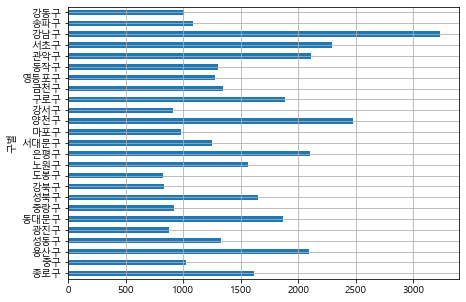

In [91]:
data_result["소계"].plot(kind="barh", figsize=(7, 5), grid=True)

#### 3-3-2. 인구 대비 CCTV 개수를 확인

In [94]:
##### "CCTV비율" 파생변수 추가 : (소계 / 인구수) * 100

data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
# data_result.head()
data_result.sort_values(by="CCTV비율")

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율,CCTV비율
구별,,,,,,,,,
강서구,608361,601696,6665,77381,1.095567,12.719586,911,134.793814,0.149747
송파구,671994,665282,6712,77978,0.998818,11.603973,1081,104.347826,0.160865
중랑구,411552,406868,4684,59992,1.138131,14.577016,916,79.960707,0.222572
강동구,438225,434027,4198,56983,0.957955,13.003138,1010,166.490765,0.230475
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621,0.236230
도봉구,345041,342861,2180,54293,0.631809,15.735231,825,246.638655,0.239102
강북구,327511,323862,3649,57002,1.114161,17.404606,831,125.203252,0.253732
마포구,385624,374742,10882,50122,2.821920,12.997635,980,212.101911,0.254134
노원구,555803,551902,3901,75081,0.701867,13.508563,1566,188.929889,0.281755


<AxesSubplot:ylabel='구별'>

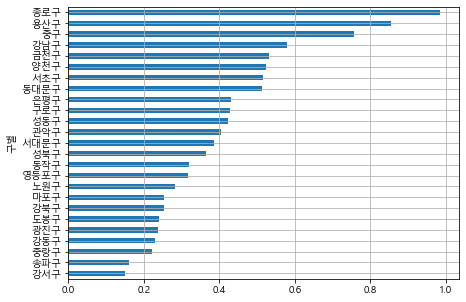

In [96]:
data_result["CCTV비율"].sort_values().plot(kind="barh", figsize=(7, 5), grid=True)

#### 3-3-3. CCTV갯수와 인구수가 서로 관계가 있는지 여부 확인

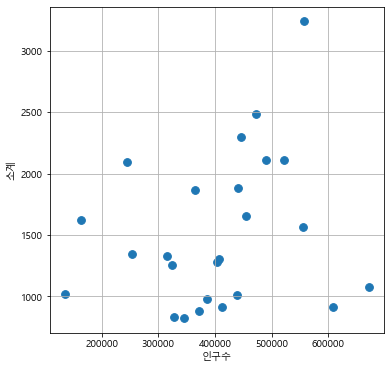

In [100]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], s=60)
plt.xlabel("인구수")
plt.ylabel("소계")
plt.grid()    #grid() 는 눈금

#1차 방정식(직선의 방정식) - >  y = ax + b

In [110]:
##### 회귀선 : y = ax + b

# numpy의 polyfit 은 a 와 b 를 구해주는 함수 - a는 기울기 b는 절편
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

# poly1d 는 a 와 b를 자동으로 구해주는 함수
f1 = np.poly1d(fp1)
print(f1)

 
0.001104 x + 1069


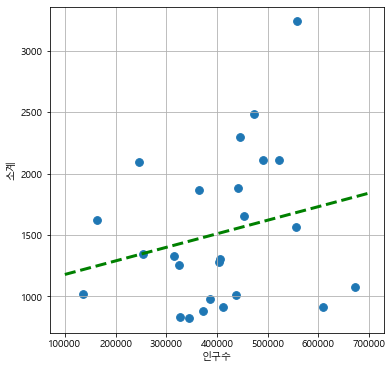

In [115]:
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], s=60)
# plt.plot(fx, fp1[0] * fx + fp1[1])
plt.plot(fx, f1(fx) ,lw=3, color="g", ls="dashed")    #lw는 선의 두께, color는 선의 색깔, ls="dashed"  는 점선표시
plt.xlabel("인구수")
plt.ylabel("소계")
plt.grid()

In [117]:
##### 각 데이터의 오차를 구해서 "오차" 라는 파생변수 추가

data_result["오차"] = np.abs(data_result["소계"] - f1(data_result["인구수"]))      # abs는 절대값 구하는 함수
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율,CCTV비율,오차
구별,,,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414,0.985105,368.866533
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758,0.756998,194.877278
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,0.854077,756.346747
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822,0.421871,89.006188
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621,0.236230,601.085154


In [118]:
df_sort = data_result.sort_values(by="오차", ascending=False)
df_sort

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율,CCTV비율,오차
구별,,,,,,,,,,
강남구,557865,552976,4889,65859,0.876377,11.805544,3238,150.619195,0.580427,1553.296412
양천구,473087,469221,3866,56070,0.817186,11.851943,2482,34.671731,0.524639,890.918761
강서구,608361,601696,6665,77381,1.095567,12.719586,911,134.793814,0.149747,829.467513
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,0.854077,756.346747
서초구,445164,440954,4210,54055,0.945719,12.142716,2297,63.371266,0.515990,736.754790
송파구,671994,665282,6712,77978,0.998818,11.603973,1081,104.347826,0.160865,729.738939
도봉구,345041,342861,2180,54293,0.631809,15.735231,825,246.638655,0.239102,624.677016
중랑구,411552,406868,4684,59992,1.138131,14.577016,916,79.960707,0.222572,607.126685
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621,0.236230,601.085154
